In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
real = pd.read_csv("CHI-JA-WLOOP-ATT-PING-MERGED.csv")
synth = pd.read_csv("clean_data.csv")


/tmp/ipykernel_432251/2826990309.py:1: DtypeWarning: Columns (138,139,146,161,162,169,178,179,186,192,195,202,205,208,215,218,221,228,231,234,241) have mixed types. Specify dtype option on import or set low_memory=False.
  real = pd.read_csv("CHI-JA-WLOOP-ATT-PING-MERGED.csv")


In [4]:
synth.columns

Index(['averageCqiDl:vector', 'servingRSRP:vector', 'servingRSRQ:vector',
       'servingSINR:vector'],
      dtype='object')

### RSRP

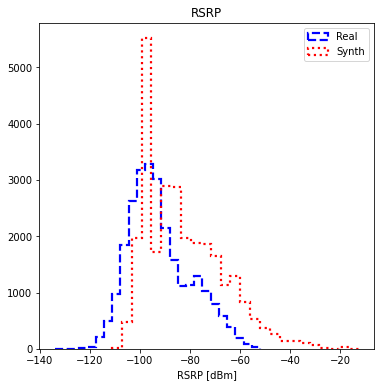

In [6]:
real_rsrp = real["5G KPI PCell RF Serving SS-RSRP [dBm]"]
synth_rsrp = synth["servingRSRP:vector"]


fig, ax = plt.subplots(figsize=(6,6))
fig = plt.gcf()
ax.hist(real_rsrp, bins=25, label="Real", histtype="step", edgecolor='blue', linewidth=2.2, linestyle="--")
ax.set_xlabel("RSRP [dBm]")
ax.hist(synth_rsrp, bins=25, label="Synth", histtype="step", edgecolor='red', linewidth=2.2,linestyle=":")
plt.title("RSRP")
plt.legend()
#plt.savefig('../../../images/graphs-simulation-kpis/RSRP.png', facecolor="white")
plt.show()

### RSRQ

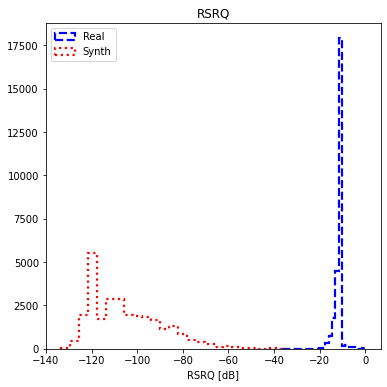

In [7]:
real_rsrq = real["5G KPI PCell RF Serving SS-RSRQ [dB]"]
synth_rsrq = synth["servingRSRQ:vector"]

_, ax = plt.subplots(figsize=(6, 6))

ax.hist(real_rsrq, bins=25, label="Real", histtype="step", edgecolor='blue', linewidth=2.2, linestyle="--")
ax.set_xlabel("RSRQ [dB]")
ax.hist(synth_rsrq, bins=25, label="Synth", histtype="step", edgecolor='red', linewidth=2.2,linestyle=":")

plt.title("RSRQ")
plt.legend()
#plt.savefig('../../../images/graphs-simulation-kpis/RSRQ.png', facecolor="white")

### SINR

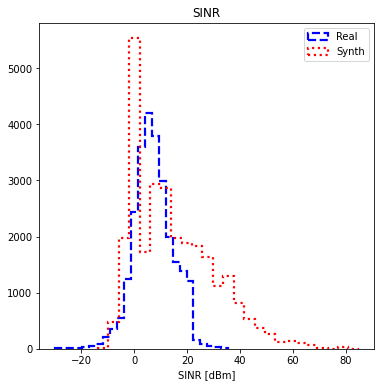

In [8]:
real_sinr = real["5G KPI PCell RF Serving SS-SINR [dB]"]
synth_sinr = synth["servingSINR:vector"]

_, ax = plt.subplots(figsize=(6, 6))

ax.hist(real_sinr, bins=25, label="Real", histtype="step", edgecolor='blue', linewidth=2.2, linestyle="--")
ax.set_xlabel("SINR [dBm]")
ax.hist(synth_sinr, bins=25, label="Synth", histtype="step", edgecolor='red', linewidth=2.2,linestyle=":")
plt.title("SINR")

plt.legend()
#plt.savefig('../../../images/graphs-simulation-kpis/SINR.png', facecolor="white")

### Throughput

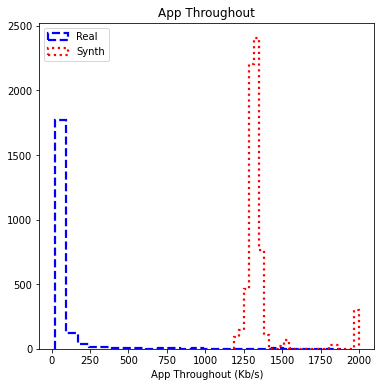

In [79]:
_, ax = plt.subplots(figsize=(6, 6))
real['5G KPI PCell Layer1 PDSCH Throughput [Mbps]'] \
    = real['5G KPI PCell Layer1 PDSCH Throughput [Mbps]'].astype(float) * 1000
real[real["5G KPI PCell Layer1 PDSCH Throughput [Mbps]"] < 20] = np.nan
real[real["5G KPI PCell Layer1 PDSCH Throughput [Mbps]"] > 2000] = np.nan
ax.hist(real["5G KPI PCell Layer1 PDSCH Throughput [Mbps]"], bins=25, label="Real", histtype="step", edgecolor='blue', linewidth=2.2, linestyle="--")
ax.set_xlabel("App Throughout (Kb/s)")
colNamePrev = synth.columns[synth.columns.str.contains("voIPReceivedThroughput")][0]
colIndex = synth.columns.get_loc(colNamePrev)+1
ax.hist(synth.iloc[1:6627, colIndex], bins=25, label="Synth", histtype="step", edgecolor='red', linewidth=2.2,linestyle=":" )
plt.title("App Throughout")
plt.legend()
plt.savefig('../../../images/graphs-simulation-kpis/Throughput.png', facecolor="white")

### CQI

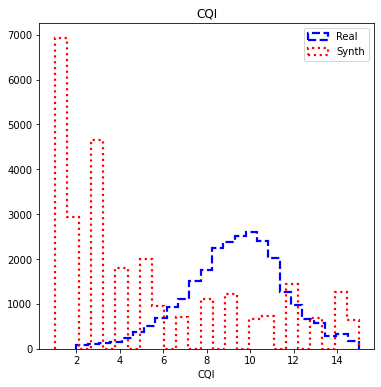

In [9]:
real_cqi = real["5G KPI PCell RF CQI"]
synth_cqi = synth["averageCqiDl:vector"]

_, ax = plt.subplots(figsize=(6, 6))

ax.hist(real_cqi, bins=25, label="Real", histtype="step", edgecolor='blue', linewidth=2.2, linestyle="--" )
ax.set_xlabel("CQI")
ax.hist(synth_cqi, bins=25, label="Synth", histtype="step", edgecolor='red', linewidth=2.2,linestyle=":")
plt.title("CQI")

plt.legend()
#plt.savefig('../../../images/graphs-simulation-kpis/CQI.png', facecolor="white")